In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [30]:
datasetEV_statewise = pd.read_csv('C:/Users/Abhi/OneDrive/Desktop/E-Vehicle/EV-Statewise.csv')
datasetEV_sale = pd.read_csv('C:/Users/Abhi/OneDrive/Desktop/E-Vehicle/EV_Sales_Category.csv')
datasetEV_charge = pd.read_csv('C:/Users/Abhi/OneDrive/Desktop/E-Vehicle/EV_Charge.csv')


In [19]:
datasetEV_statewise.head()
datasetEV_sale.head()

,Category,Fuel Types,2020-21,2021-22,2022-23
0,Passenger Vehicles (e-4W),EVs,5000,19000,47581
1,Three Wheelers (e-3W),EVs,88000,178000,402106
2,Two Wheelers (e-2W),EVs,41000,231000,728027


In [6]:
datasetEV_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   S. No.                  35 non-null     object
 1   State Name              35 non-null     object
 2   Electric Vehicle Count  35 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


In [9]:


# Function to format the X-axis in lakhs (L)
def lakhs_formatter(x, pos):
    if x >= 1e5:
        return f'{int(x / 1e5)}L'
    elif x >= 1e3:
        return f'{int(x / 1e3)}K'
    return int(x)




In [11]:
from matplotlib.ticker import FuncFormatter

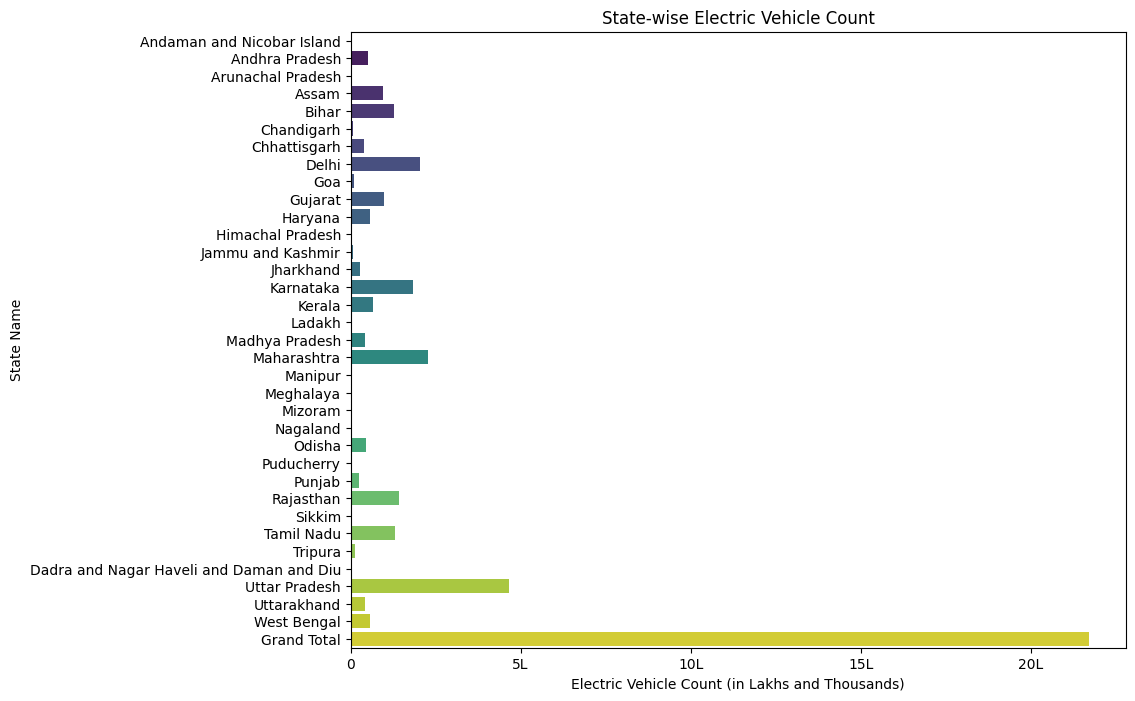

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Electric Vehicle Count', y='State Name', data=datasetEV_statewise, palette='viridis')

# Format the X-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(lakhs_formatter))

# Add labels and title
plt.xlabel('Electric Vehicle Count (in Lakhs and Thousands)')
plt.ylabel('State Name')
plt.title('State-wise Electric Vehicle Count')

# Show the plot
plt.show()

FROM Above analysis we can see that UP,Maharashtra,Delhi,Karnataka tops in number count of EV vehicles we will get top4 states from above for consideration

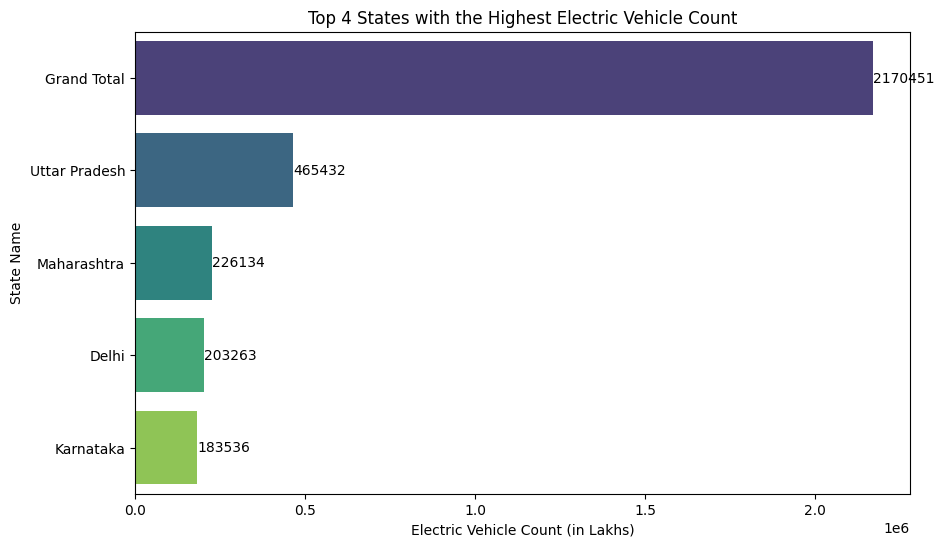

In [16]:


# Sort the data to get top four states based on EV count
top_four_states = datasetEV_statewise.sort_values(by='Electric Vehicle Count', ascending=False).head(5)


# Create a horizontal bar plot for the top four states
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric Vehicle Count', y='State Name', data=top_four_states, palette='viridis')



# Add labels and title
plt.xlabel('Electric Vehicle Count (in Lakhs)')
plt.ylabel('State Name')
plt.title('Top 4 States with the Highest Electric Vehicle Count')

for index, value in enumerate(top_four_states['Electric Vehicle Count']):
    plt.text(value + 200, index, f'{value}', color='black', va='center')

# Show the plot
plt.show()


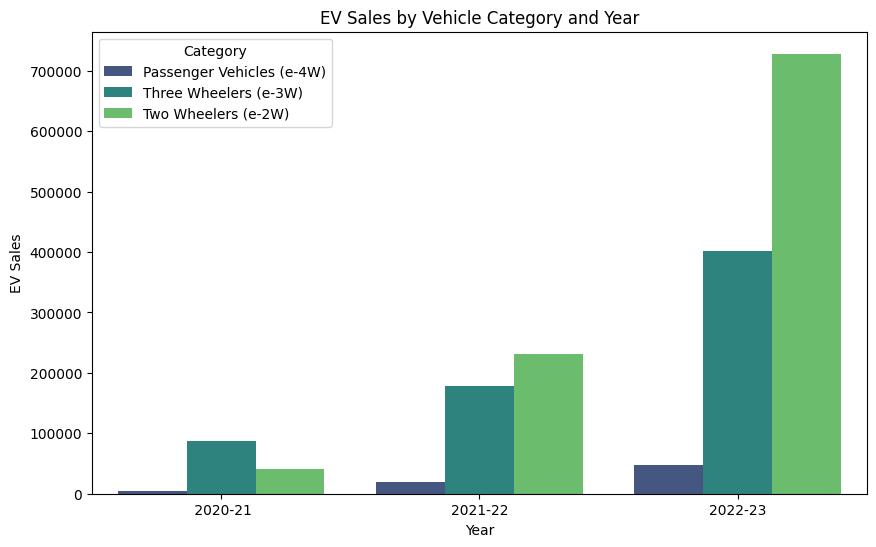

In [29]:



# Reshape the data to a long format suitable for seaborn
datasetEV_sale_melted = datasetEV_sale.melt(id_vars='Category', var_name='Year', value_name='Sales')

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Category', data=datasetEV_sale_melted, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('EV Sales by Vehicle Category and Year')

# Show the plot
plt.show()


here we can say that 2 wheeler ev sales are increasing year on year 3 wheeler sales are increasing but in stable manner

In [35]:
datasetEV_charge.head()



,Sl. No.,State/UTs,Number of EV charging Stations
0,1,Andaman and Nicobar Islands,1
1,2,Andhra Pradesh,249
2,3,Arunachal Pradesh,30
3,4,Assam,147
4,5,Bihar,96


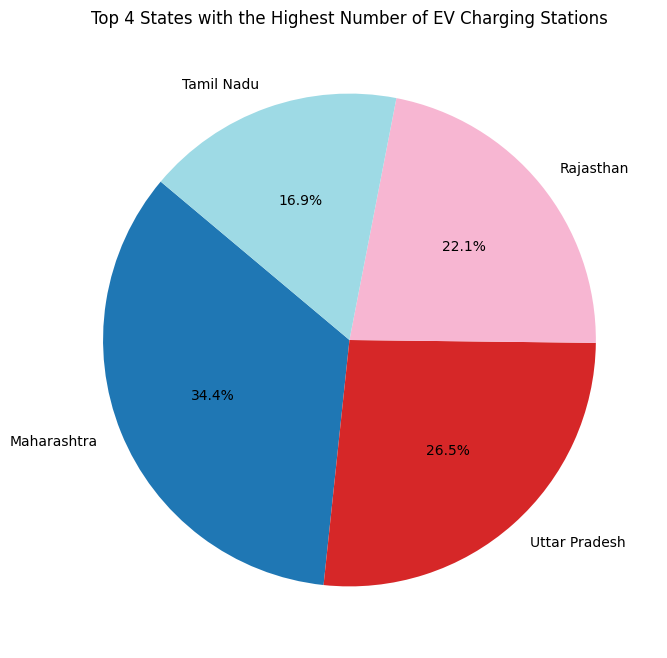

In [3]:
import matplotlib.cm as cm
# Load the dataset from a CSV file
df = pd.read_csv('C:/Users/Abhi/OneDrive/Desktop/E-Vehicle/EV_Charge.csv')

# Drop the last row with 'Grand Total'
df = df[df['State/UTs'] != 'Grand Total']

# Sort the data to get the top 4 states based on the number of EV charging stations
top_n = 4  # Change this number to get more or fewer top states
top_states = df.sort_values(by='Number of EV charging Stations', ascending=False).head(top_n)

# Generate a color map with enough colors for the number of slices
colors = cm.get_cmap('tab20', top_n).colors

# Plot a pie chart with dynamic colors
plt.figure(figsize=(8, 8))
plt.pie(top_states['Number of EV charging Stations'], 
        labels=top_states['State/UTs'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)

# Add a title
plt.title(f'Top {top_n} States with the Highest Number of EV Charging Stations')

# Show the plot
plt.show()


Maharashtra have the big charge station infra followed by UP rajsthan and Tamil nadu